## RAI vs EUR GBP CHF AUD JPY (base USD) 

Read on-chain RAI data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from web3 import Web3, HTTPProvider

from abis import LINK_ETH, LINK_ETH_ABI, LINK_ETH_FIRST_BLOCK
from abis import LINK_RAI, LINK_RAI_ABI, LINK_RAI_FIRST_BLOCK
from abis import ORACLE_RELAYER, ORACLE_RELAYER_ABI, ORACLE_RELAYER_FIRST_BLOCK

from mp import fetch, fetch_link_mp, fetch_rp

size = 15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,12),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}

plt.rcParams.update(params)

In [2]:
# Need an archive node

ETH_RPC_URL=os.environ['ETH_RPC_URL']
web3 = Web3(HTTPProvider(endpoint_uri=ETH_RPC_URL, request_kwargs={"timeout": 10}))
print(ETH_RPC_URL)

https://mainnet.infura.io/v3/6d7b5475e5a346738c8c72b1968e1d10


In [3]:
first_block = 13334360 # to be set to ~1 year before ExRates API start_date monthly, considering monthly output of data
interval = 6379 * 1 #number of blocks per day
num_blocks = None

latest_block = web3.eth.get_block("latest")['number']

if not num_blocks:
    last_block = latest_block - 12
else:
    last_block = min(latest_block - 12, first_block + num_blocks)

print(f"first block {first_block}, last_block {last_block}")
blocks = list(range(first_block, last_block + 1, interval))

first block 13334360, last_block 18757460


In [4]:
#start = time.time()
mp_results = fetch(fetch_link_mp, 8, LINK_RAI, LINK_RAI_ABI, ETH_RPC_URL, blocks=blocks)
#print(f"took {time.time() - start}"

Could not decode contract function call to latestRoundData with return data: b'', output_types: ['uint80', 'int256', 'uint256', 'uint256', 'uint80']
Could not decode contract function call to latestRoundData with return data: b'', output_types: ['uint80', 'int256', 'uint256', 'uint256', 'uint80']
Could not decode contract function call to latestRoundData with return data: b'', output_types: ['uint80', 'int256', 'uint256', 'uint256', 'uint80']
Could not decode contract function call to latestRoundData with return data: b'', output_types: ['uint80', 'int256', 'uint256', 'uint256', 'uint80']
Could not decode contract function call to latestRoundData with return data: b'', output_types: ['uint80', 'int256', 'uint256', 'uint256', 'uint80']
Could not decode contract function call to latestRoundData with return data: b'', output_types: ['uint80', 'int256', 'uint256', 'uint256', 'uint80']
Could not decode contract function call to latestRoundData with return data: b'', output_types: ['uint80',

In [5]:
rp_results = fetch(fetch_rp, 8, ORACLE_RELAYER, ORACLE_RELAYER_ABI, ETH_RPC_URL, blocks=blocks)

In [6]:
rp_df = pd.DataFrame(rp_results)
#rp_df.index
rp_df.head(10)

,0,1
0,13334360,3033482280537111185913008558
1,13340739,3033128663354347851184873148
2,13347118,3032975989028188290483828050
3,13353497,3032986552183453139008411861
4,13359876,3032744097426246460286441075
5,13366255,3032631840316264267239291218
6,13372634,3032452562106417756567735875
7,13379013,3032184404226887725743756288
8,13385392,3032099273658799998209117952
9,13391771,3031921600790129999121293097


In [7]:
mp_df=pd.DataFrame(mp_results)
mp_df.drop([3], axis=1, inplace=True)
mp_df.head(10)

,0,1,2
0,13410908,303405358,1634112168
1,13417287,304190397,1634198565
2,13423666,303570639,1634284964
3,13430045,303311954,1634371411
4,13436424,303385394,1634457830
5,13442803,303000000,1634544271
6,13449182,304089626,1634630616
7,13455561,304134108,1634717007
8,13461940,302977953,1634803412
9,13468319,303429159,1634889828


In [8]:
rp_df.index

RangeIndex(start=0, stop=851, step=1)

In [9]:
mp_df.index

RangeIndex(start=0, stop=839, step=1)

In [10]:
rai_df = pd.merge(rp_df,mp_df, left_on=[0], right_on=[0], how='outer').astype(object)
rai_df.columns=(['block','RAI_rp','RAI_mp','UnixTimestamp'])
rai_df

,block,RAI_rp,RAI_mp,UnixTimestamp
0,13334360,3033482280537111185913008558,NaN,NaN
1,13340739,3033128663354347851184873148,NaN,NaN
2,13347118,3032975989028188290483828050,NaN,NaN
3,13353497,3032986552183453139008411861,NaN,NaN
4,13359876,3032744097426246460286441075,NaN,NaN
...,...,...,...,...
846,18730994,2823168144674984876562800304,280280532.0,1701910211.0
847,18737373,2823782502034091570846124588,283072390.0,1701987467.0
848,18743752,2824016337781835318040609690,281279373.0,1702064099.0
849,18750131,2824337475207701502849462749,279066937.0,1702140719.0


In [11]:
rai_df['RAI_rp'] = rai_df['RAI_rp']*1e-27
rai_df['RAI_mp'] = rai_df['RAI_mp']*1e-8
rai_df.index = pd.to_datetime(rai_df['UnixTimestamp'], unit='s').dt.date
rai_final_df = rai_df[['RAI_rp','RAI_mp']]
rai_final_df.index.name = None

In [12]:
#rai_final_df = rai_final_df.transpose()
rai_final_df

,RAI_rp,RAI_mp
NaT,3.033482,NaN
NaT,3.033129,NaN
NaT,3.032976,NaN
NaT,3.032987,NaN
NaT,3.032744,NaN
...,...,...
2023-12-07,2.823168,2.802805
2023-12-07,2.823783,2.830724
2023-12-08,2.824016,2.812794
2023-12-09,2.824337,2.790669


In [13]:
from ExRates import ExRates_final_df

In [14]:
ExRates_final_df = ExRates_final_df.transpose()
ExRates_final_df

,EUR,GBP,CHF,AUD,CAD,JPY,CNY
2021-10-07,1.156067,1.361813,1.07697,0.7317,0.796898,0.008955,0.155118
2021-10-08,1.157536,1.3615,1.077951,0.7309,0.80179,0.00891,0.1552
2021-10-09,1.157536,1.36135,1.078225,0.7309,0.801828,0.008912,0.1552
2021-10-10,1.156577,1.361563,1.077705,0.729406,0.801057,0.008908,0.1552
2021-10-11,1.155435,1.359194,1.078053,0.73487,0.801253,0.00882,0.155022
...,...,...,...,...,...,...,...
2023-12-05,1.079328,1.259367,1.142764,0.65546,0.735746,0.006794,0.139927
2023-12-06,1.076577,1.256045,1.143282,0.655117,0.7357,0.006796,0.139946
2023-12-07,1.07904,1.258788,1.142211,0.659354,0.735327,0.006931,0.139864
2023-12-08,1.077349,1.2552,1.136488,0.6583,0.735592,0.006903,0.139606


In [15]:
df = pd.merge(ExRates_final_df, rai_final_df,left_index=True, right_index=True)
#df.to_csv('RAIvsEURGBPCHFAUDJPYCNY.csv')
#pd.set_option('display.max_rows', 50)
df

,EUR,GBP,CHF,AUD,CAD,JPY,CNY,RAI_rp,RAI_mp
2021-10-13,1.159804,1.366858,1.082181,0.738302,0.803852,0.008826,0.155567,3.031777,3.034054
2021-10-14,1.159154,1.366961,1.081835,0.741482,0.808113,0.008784,0.155271,3.031499,3.041904
2021-10-15,1.159911,1.374701,1.082953,0.741792,0.807931,0.008743,0.155381,3.030932,3.035706
2021-10-16,1.159911,1.374501,1.082953,0.741792,0.807931,0.008743,0.155381,3.03066,3.03312
2021-10-17,1.159676,1.376074,1.082955,0.7425,0.808113,0.008746,0.155381,3.030477,3.033854
...,...,...,...,...,...,...,...,...,...
2023-12-06,1.076577,1.256045,1.143282,0.655117,0.7357,0.006796,0.139946,2.822619,2.788371
2023-12-07,1.07904,1.258788,1.142211,0.659354,0.735327,0.006931,0.139864,2.823168,2.802805
2023-12-07,1.07904,1.258788,1.142211,0.659354,0.735327,0.006931,0.139864,2.823783,2.830724
2023-12-08,1.077349,1.2552,1.136488,0.6583,0.735592,0.006903,0.139606,2.824016,2.812794


In [16]:
df.index

DatetimeIndex(['2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16',
               '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22',
               ...
               '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04',
               '2023-12-05', '2023-12-06', '2023-12-07', '2023-12-07',
               '2023-12-08', '2023-12-09'],
              dtype='datetime64[ns]', length=838, freq=None)

In [17]:
first_date = min(df.index)
rai_rp_setpoint = df.loc[first_date, 'RAI_rp']
rai_mp_setpoint = df.loc[first_date, 'RAI_mp']
eur_setpoint = df.loc[first_date, 'EUR']
gbp_setpoint = df.loc[first_date, 'GBP']
chf_setpoint = df.loc[first_date, 'CHF']
aud_setpoint = df.loc[first_date, 'AUD']
cad_setpoint = df.loc[first_date, 'CAD']
jpy_setpoint = df.loc[first_date, 'JPY']
cny_setpoint = df.loc[first_date, 'CNY']
df['rai_rp_norm'] = (df['RAI_rp']/rai_rp_setpoint)
df['rai_mp_norm'] = (df['RAI_mp']/rai_mp_setpoint)
df['eur_norm'] = (df['EUR']/eur_setpoint)
df['gbp_norm'] = (df['GBP']/gbp_setpoint)
df['chf_norm'] = (df['CHF']/chf_setpoint)
df['aud_norm'] = (df['AUD']/aud_setpoint)
df['cad_norm'] = (df['CAD']/cad_setpoint)
df['jpy_norm'] = (df['JPY']/jpy_setpoint)
df['cny_norm'] = (df['CNY']/cny_setpoint)

In [18]:
df


,EUR,GBP,CHF,AUD,CAD,JPY,CNY,RAI_rp,RAI_mp,rai_rp_norm,rai_mp_norm,eur_norm,gbp_norm,chf_norm,aud_norm,cad_norm,jpy_norm,cny_norm
2021-10-13,1.159804,1.366858,1.082181,0.738302,0.803852,0.008826,0.155567,3.031777,3.034054,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-10-14,1.159154,1.366961,1.081835,0.741482,0.808113,0.008784,0.155271,3.031499,3.041904,0.999908,1.002587,0.99944,1.000075,0.999681,1.004308,1.005301,0.995235,0.9981
2021-10-15,1.159911,1.374701,1.082953,0.741792,0.807931,0.008743,0.155381,3.030932,3.035706,0.999721,1.000545,1.000093,1.005738,1.000714,1.004728,1.005074,0.990575,0.998803
2021-10-16,1.159911,1.374501,1.082953,0.741792,0.807931,0.008743,0.155381,3.03066,3.03312,0.999632,0.999692,1.000093,1.005591,1.000714,1.004728,1.005074,0.990575,0.998803
2021-10-17,1.159676,1.376074,1.082955,0.7425,0.808113,0.008746,0.155381,3.030477,3.033854,0.999571,0.999934,0.99989,1.006743,1.000716,1.005687,1.005301,0.990943,0.998804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06,1.076577,1.256045,1.143282,0.655117,0.7357,0.006796,0.139946,2.822619,2.788371,0.931011,0.919025,0.928241,0.918929,1.056461,0.88733,0.915218,0.76999,0.899589
2023-12-07,1.07904,1.258788,1.142211,0.659354,0.735327,0.006931,0.139864,2.823168,2.802805,0.931193,0.923782,0.930364,0.920936,1.055471,0.893069,0.914754,0.785299,0.89906
2023-12-07,1.07904,1.258788,1.142211,0.659354,0.735327,0.006931,0.139864,2.823783,2.830724,0.931395,0.932984,0.930364,0.920936,1.055471,0.893069,0.914754,0.785299,0.89906
2023-12-08,1.077349,1.2552,1.136488,0.6583,0.735592,0.006903,0.139606,2.824016,2.812794,0.931472,0.927075,0.928907,0.91831,1.050183,0.891641,0.915083,0.78213,0.897398


In [19]:
# df['dates'] = df.index.astype(object)
# df

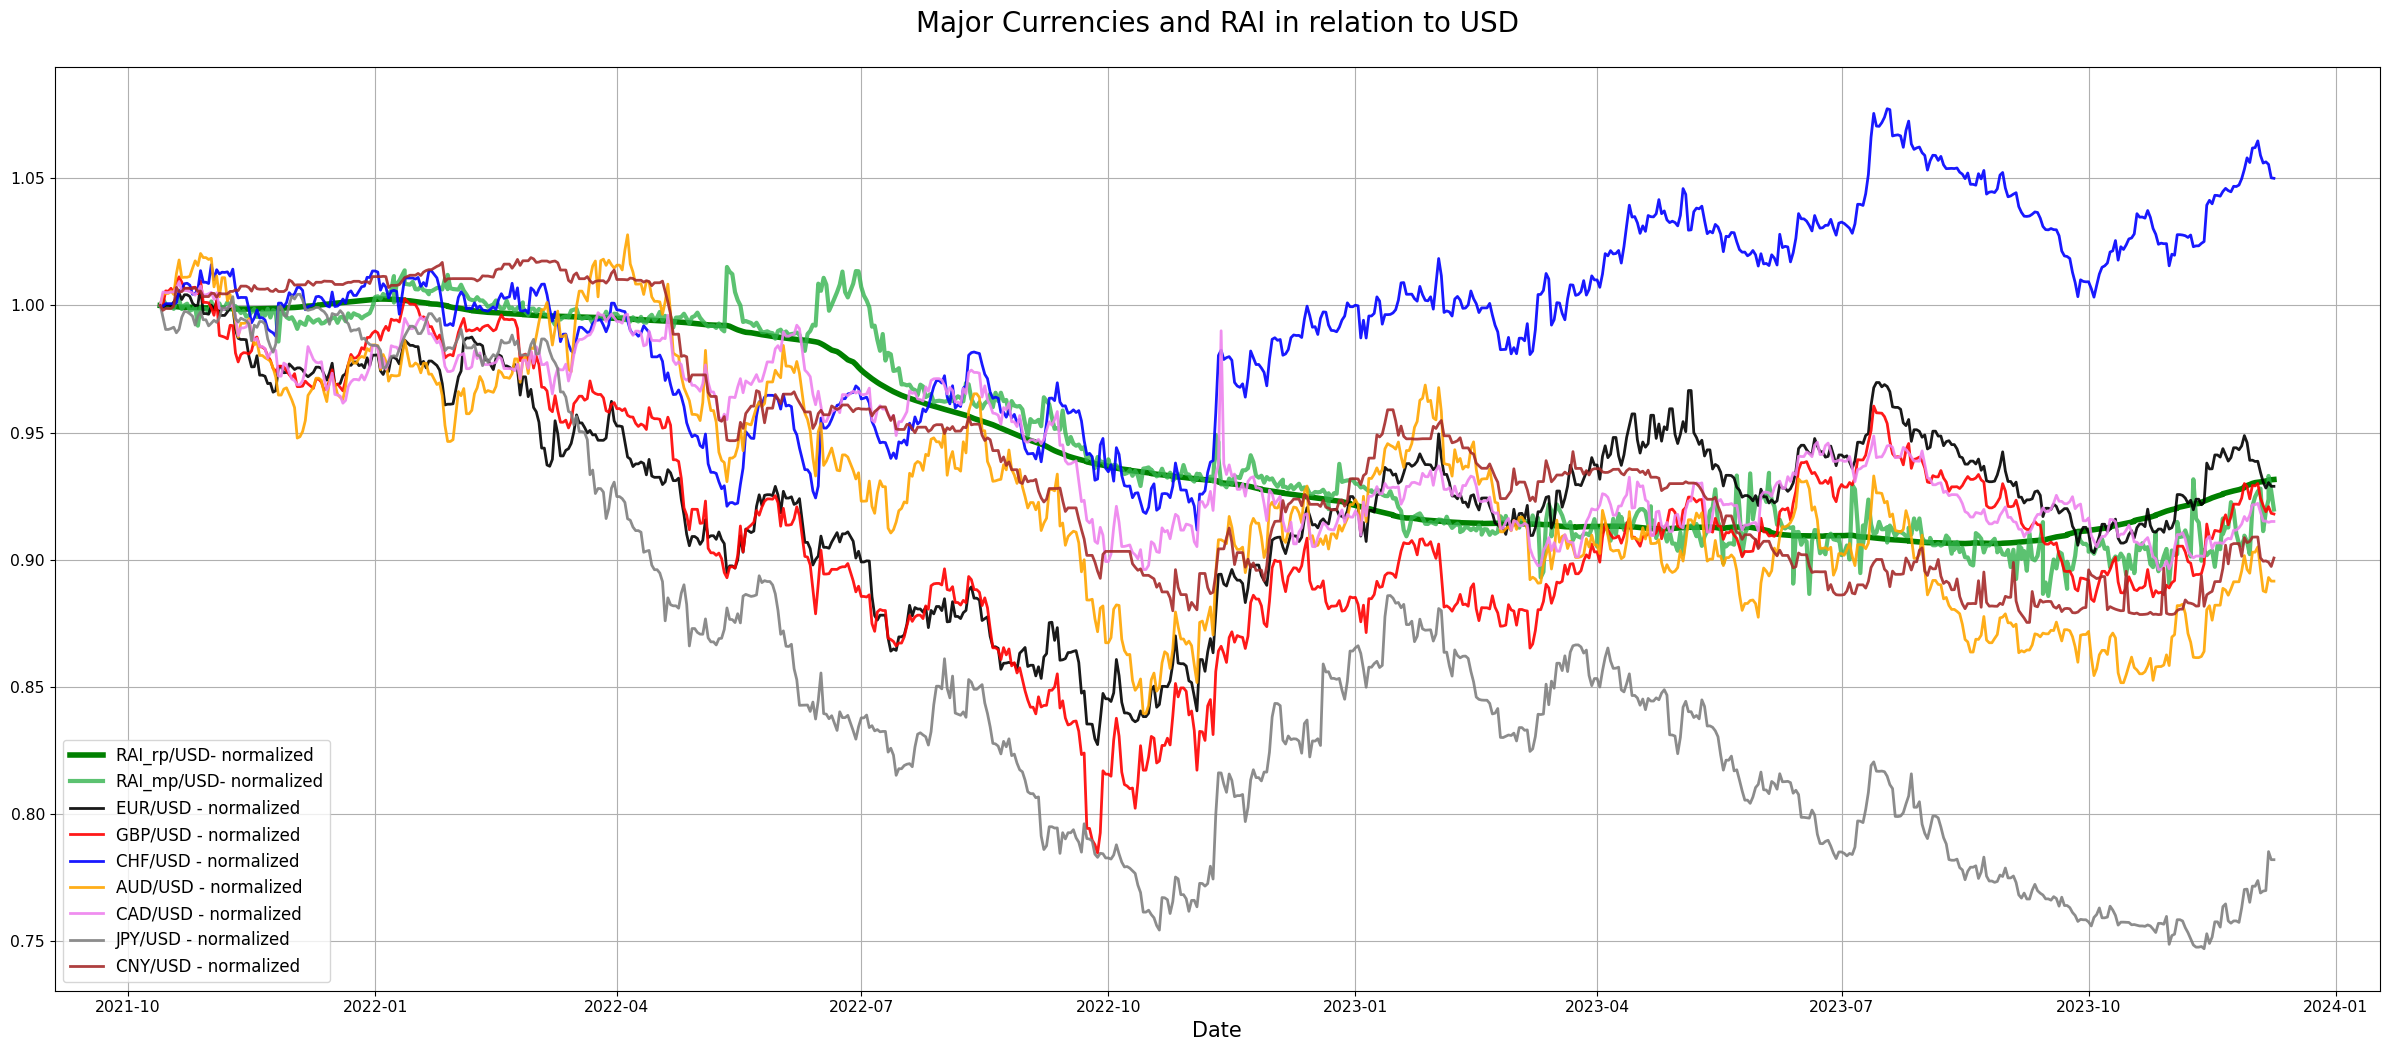

In [20]:
fig, ax = plt.subplots(1,1)
ax.set_title('Major Currencies and RAI in relation to USD', size=20)
ax.plot(df['rai_rp_norm'], label = 'RAI_rp/USD- normalized', linewidth = 4, color = 'green')
ax.plot(df['rai_mp_norm'], label = 'RAI_mp/USD- normalized', linewidth = 3, alpha= 0.8, color = (0.2,0.7,0.3))
ax.plot(df['eur_norm'], linewidth= 2, alpha= 0.9, label='EUR/USD - normalized', color='black')
ax.plot(df['gbp_norm'], linewidth= 2, alpha= 0.9, label='GBP/USD - normalized', color='red')
ax.plot(df['chf_norm'], linewidth= 2, alpha= 0.9, label='CHF/USD - normalized', color='blue')
ax.plot(df['aud_norm'], linewidth= 2, alpha= 0.9, label='AUD/USD - normalized', color='orange')
ax.plot(df['cad_norm'], linewidth= 2, alpha= 0.9, label='CAD/USD - normalized', color='violet')
ax.plot(df['jpy_norm'], linewidth= 2, alpha= 0.9, label='JPY/USD - normalized', color='gray')
ax.plot(df['cny_norm'], linewidth= 2, alpha= 0.9, label='CNY/USD - normalized', color='brown')
ax.set_xlabel('Date')
# ax.set_ylabel('/USD (normalised)')
ax.legend()
ax.grid()
fig.set_figwidth(30)